The MNIST database of handwritten digits.

label
call_split
bar_chart
70,000 items
Value
arrow_drop_up
Count
0
6,903
1
7,877
2
6,990
3
7,141
4
6,824
5
6,313
6
6,876
7
7,293
8
6,825
9
6,958
split
call_split
bar_chart
70,000 items
Value
arrow_drop_up
Count
test
10,000
train


In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
# You cannot modify from here until it is indicated by a comment
(test_data),test_data_info=tfds.load('mnist',split='test',with_info=True,as_supervised=True)

(train_data),ds_info=tfds.load('mnist',split=['train[10000:45000]'],with_info=True,as_supervised=True)

def getnewtst():
  (new_test),new_test_info=tfds.load('mnist',split=['train[0:9999]'],with_info=True,as_supervised=True)
  new_test = new_test[0].map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
  new_test = new_test.batch(64)
  new_test = new_test.cache()
  new_test = new_test.prefetch(tf.data.AUTOTUNE)
  return new_test

# Can modify code now below this comment
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`.
  The model wants the float and tfds gives you 0-255."""
  return tf.cast(image, tf.float32) / 255., label


train_data = train_data[0].map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
train_data = train_data.cache()
train_data = train_data.shuffle(ds_info.splits['train'].num_examples)
train_data = train_data.batch(64)
train_data = train_data.prefetch(tf.data.AUTOTUNE)

test_data = test_data.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
test_data = test_data.batch(128)
test_data = test_data.cache()
test_data = test_data.prefetch(tf.data.AUTOTUNE)



Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to ~/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
## checking the data dimmensions after normalization
print(train_data)
print(len(train_data))

print(test_data)
print(len(test_data))

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
547
<PrefetchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
79


In [ ]:
model = tf.keras.models.Sequential([
    
  tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Dropout(0.5),

  tf.keras.layers.Flatten(),

  tf.keras.layers.Dense(units=120, activation='relu'),
  tf.keras.layers.Dense(units=84, activation='relu'),
  tf.keras.layers.Dense(units=10, activation = 'softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    train_data,
    epochs=50,
    validation_data=test_data,
)

#Results of the code given
results = model.evaluate(getnewtst())
print("test loss, test acc:", results)

Epoch 1/50
547/547 [==============================] - 3s 4ms/step - loss: 0.5754 - sparse_categorical_accuracy: 0.8134 - val_loss: 0.1251 - val_sparse_categorical_accuracy: 0.9636
Epoch 2/50
547/547 [==============================] - 2s 4ms/step - loss: 0.2198 - sparse_categorical_accuracy: 0.9313 - val_loss: 0.0822 - val_sparse_categorical_accuracy: 0.9719
Epoch 3/50
547/547 [==============================] - 2s 4ms/step - loss: 0.1682 - sparse_categorical_accuracy: 0.9466 - val_loss: 0.0611 - val_sparse_categorical_accuracy: 0.9799
Epoch 4/50
547/547 [==============================] - 3s 5ms/step - loss: 0.1459 - sparse_categorical_accuracy: 0.9544 - val_loss: 0.0617 - val_sparse_categorical_accuracy: 0.9822
Epoch 5/50
547/547 [==============================] - 2s 4ms/step - loss: 0.1357 - sparse_categorical_accuracy: 0.9574 - val_loss: 0.0537 - val_sparse_categorical_accuracy: 0.9835
Epoch 6/50
547/547 [==============================] - 2s 4ms/step - loss: 0.1177 - sparse_categorica

original test loss, test acc:   
[0.16437819600105286, 0.9523952603340149]

# Original Code results
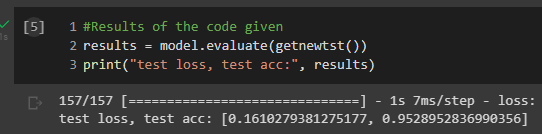

# Report

### For this project I decided to use a CNN, I modified multiple aspects of the given CNN. The performance of the changes are individual, and the overall performance of all the changes will be reported at the end.



## A. Increase the number of epochs

*     I increased the number of epochs in order for the model to better understand the training data. The performance of the test accuracy increased by 2% and the loss decreased by 0.7%.    
   
*     Although by increasing the number of epochs to a larger number (i.e. more than 50 Epochs), the loss and accuracy performance is better. However, this has the potential to overfit the data. Since the training set comes from the same source it is difficult to check if it's overfitting with the given data.
  
Code modified:  
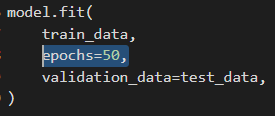

test loss, test acc: [0.08327002078294754, 0.9762976169586182]

## B. Add and modify the Convolutional Layers 


*   By adding more convolutional layers you can better understand the features of the image. There is a point of diminishing returns, especially with an image this small. For this dataset I only added an extra layer, adding more layers didn't result in any significant changes in accuracy.  
 
*   Don't change the activation function - Relu seems to be the most stable function for convolutional layers (Relu, Sigmoid, Softmax). The other two functions produce inconsistent results  
 
*   Add the input size to the first layer - adding the correct input size to the first layer of the network increases the performance. This could be because the default parameters are not properly evaluating the size of the   
 
* Filters indicate the number of kernels the layers are going to learn, the first layer will learn 6 filters (instead of 64), and the second will learn 16, this will allow the second layer to extract more detailed features than the old model.



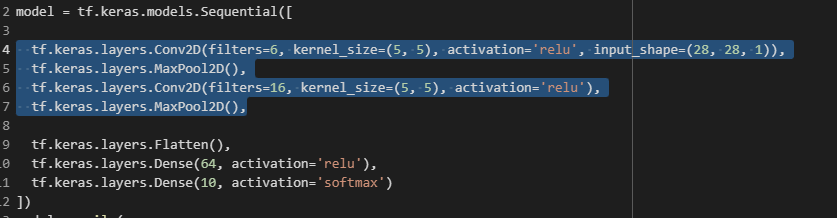


test loss, test acc: [0.09786345809698105, 0.9720972180366516]

# C. Add one extra dense layer
  


*   In CNNs dense layers are typically used as an output of the Conv layers. Thus, by just adding a dense layer without an extra convolutional layer, the performance of the network should vary.


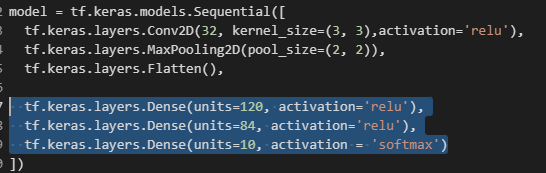



test loss, test acc: [0.15268263220787048, 0.9542954564094543]

## D. Optimizer Function


*   Change the optimizer function from SGD to Adam  

*   Optimizers define how Neural Networks work by finding the values of parameters such that the loss function is the lowest. Stochastic gradient descent may make very noisy jumps in the data, thus affecting the learning of the model. Adam uses the expected values of past gradients to better pick an optimal value for the loss function. The learning rate was chosen arbitrarily by testing different values for it.  
    
* By changing the optimizer the accuracy increased by ~3%

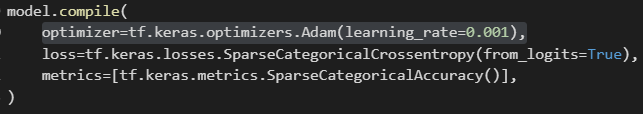
  
test loss, test acc: [0.07252685725688934, 0.9804980754852295]


## Add dropout


*   Drop out is a form of regularization that randomly deletes units and their connections while training. Drop out is usually used to avoid overfitting. However, in the case of this network the testing data is too small, thus by dropping out some of the training samples this could improve performance.
*   Unfortunately, since I'm only testing drop out with one convolutional layer, the test accuracy decreases (this is not the case when combining all changes to the CNN).

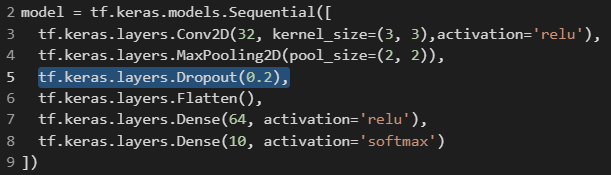
  
test loss, test acc: [0.1665712296962738, 0.9496949911117554]


# Result of combining all the changes   
  
  
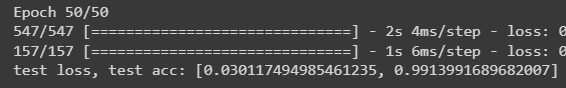

# Calculating the accuracy bounds  

Assuming:  
*   alpha = 0.05
*   z = 1.96

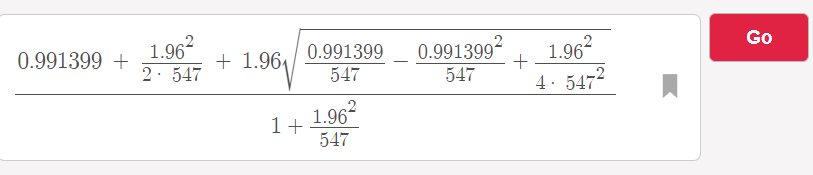

0.97953 <= x <= 0.99641